# Pandas로 국민청원 데이터 분석하기

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
from plotnine import *
import plotnine

In [64]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

# !apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = './NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [65]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

## Pandas와 NumPy를 import해 옵니다.

In [12]:
import pandas as pd
import numpy as np

## csv 데이터를 불러 옵니다.

In [14]:
df = pd.read_csv('data/petition.csv', parse_dates=['start', 'end'])

## 읽어온 데이터가 몇 행 몇 열인지 봅니다.

In [15]:
df.shape

(395547, 8)

## 일부 데이터 미리 보기
* 상단 5개의 데이터를 불러옵니다.

In [16]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


* 하단 3개의 데이터를 불러옵니다.

In [17]:
df.tail(3)

,article_id,start,end,answered,votes,category,title,content
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


## 결측치가 있는지 확인해 봅니다.

In [18]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

## 데이터 요약하기
* 어떤 컬럼이 있고 어떤 타입인지 출력해 봅니다.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
article_id    395547 non-null int64
start         395547 non-null datetime64[ns]
end           395547 non-null datetime64[ns]
answered      395547 non-null int64
votes         395547 non-null int64
category      395547 non-null object
title         395547 non-null object
content       395546 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


* 데이터 타입만 따로 뽑아 봅니다.

In [20]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
dtype: object

* 컬럼명만 따로 추출해 봅니다.

In [21]:
df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

* 수치형 데이터에 대한 요약을 봅니다.

In [22]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


* 카테고리(object) 형태의 데이터에 대한 요약을 봅니다.

In [23]:
df.describe(include=np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


## 답변대상 청원 보기
20만건 이상 투표를 받으면 답변 대상 청원이 됩니다.<br/>20만건 이상 투표를 받은 청원의 갯수를 세어보세요.

In [24]:
df_20 = df.loc[df['votes'] > 200000]
df_20.shape

(80, 8)

In [25]:
df.loc[df['votes'] > 1000 ].count()

article_id    3472
start         3472
end           3472
answered      3472
votes         3472
category      3472
title         3472
content       3472
dtype: int64

In [27]:
df_20.category.value_counts()

인권/성평등         24
안전/환경          10
정치개혁            8
기타              8
문화/예술/체육/언론     7
반려동물            4
외교/통일/국방        4
보건복지            3
육아/교육           3
교통/건축/국토        3
경제민주화           2
성장동력            2
미래              1
행정              1
Name: category, dtype: int64

In [28]:
df_20[['title', 'content']].head(3)

,title,content
1752,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...
10894,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
18111,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...


* 20만건 이상 투표를 받은 상위 5개의 청원을 head()를 통해 출력해 보세요.

In [29]:
df_20_loc = df.loc[df.votes > 200000]
df_20_loc.sort_values(by='votes', ascending=False).head()

,article_id,start,end,answered,votes,category,title,content
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달..."
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...


* 20만건 이상 투표를 받은 청원을 별도의 컬럼을 만들어 줍니다. 컬럼 이름은 `answer`로 합니다.

In [30]:
df['answer'] = (df['votes'] > 200000) == 1

* df 데이터프레임의 크기를 다시 찍어 보세요. 컬럼 하나가 늘었나요?

In [31]:
df.shape

(395547, 9)

In [32]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
answer                  bool
dtype: object

* 새로 생성해 준 answer의 타입은 boolean 타입입니다. int로 변경해 보세요.

In [33]:
df['answer'] = df['answer'].astype('int')

* 답변대상 청원중 아직 답변되지 않은 청원의 수를 계산해 보세요.

In [34]:
df['answer_diff'] = df['answer'] - df['answered']
df['answer_diff'].sum()

51

## 답변 대상 청원 중 투표를 가장 많이 받은 것

In [35]:
answered_df = df.loc[df['answer'] == 1]
answered_df.sort_values('votes', ascending=False).head(5)

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,1,1
208597,269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,1,1
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1,0
118970,142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",1,0
183791,230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,1,0


## 어느 분야의 청원이 가장 많이 들어왔는지?
pandas의 value_counts로 특정 컬럼의 데이터를 그룹화하여 카운된 숫자를 볼 수 있습니다.<br/>
어느 분야의 청원이 가장 많이 들어왔는지 찾아보세요.

In [ ]:
category = pd.DataFrame(df['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

## 청원이 가장 많이 들어 온 날은 언제인지 정렬해 보세요.

In [37]:
start_df = pd.DataFrame(df['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()

청원 집계: 535일


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


## 피봇 테이블로 투표를 가장 많이 받은 분야를 찾아보세요.

In [38]:
petitions_unique = pd.pivot_table(df, index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', \
                                              ascending=False).reset_index()
petitions_best

,category,answer,answer_diff,answered,article_id,votes
0,인권/성평등,24,15,9,7963154504,12559348
1,안전/환경,10,8,2,7529327085,6605175
2,정치개혁,8,6,2,14675522264,6205013
3,기타,8,7,1,12225143856,5190468
4,육아/교육,3,2,1,5822857976,4475297
5,보건복지,3,1,2,6589637853,4341211
6,문화/예술/체육/언론,7,3,4,4427495546,4149796
7,외교/통일/국방,4,3,1,6869752323,3696112
8,교통/건축/국토,3,1,2,8551310963,2902330
9,반려동물,4,4,0,1033826398,2066624


## 투표를 가장 많이 받은 날은 언제일까요?

In [ ]:
petitions_start = pd.pivot_table(df, index=['start'], aggfunc=np.sum)
votes_df = petitions_start.sort_values(by='votes', ascending=False)
votes_df.loc[petitions_start['votes'] > 350000]

## 청원을 많이 받은 날 VS 투표를 많이 받은 날에 대해 각각 상위 5개 목록을 추출해 봅니다. 
이때, title, content는 안 나와도 됩니다.

In [40]:
# 두 개의 데이터프레임을 합치기 위해 인덱스를 생성한다.
votes_df = votes_df.reset_index()
hottest_day_df = start_df.merge(votes_df, on='start', how='left')
hottest_day_df.sort_values('counts', ascending=False)[:5]

,start,counts,answer,answer_diff,answered,article_id,votes
0,2017-11-11,9623,0,0,0,348559310,85074
1,2017-09-05,5952,0,0,0,38414241,48808
2,2018-01-11,3368,0,0,0,291069195,44570
3,2018-02-06,2631,0,0,0,342371897,83038
4,2017-11-09,2487,0,0,0,73459579,34774


In [41]:
hottest_day_df.sort_values('votes', ascending=False)[:5]

,start,counts,answer,answer_diff,answered,article_id,votes
116,2018-10-17,926,1,1,0,378900198,1300523
81,2018-10-31,1010,2,2,0,430964099,827096
384,2018-06-13,542,1,1,0,146187973,786157
72,2018-10-18,1032,2,2,0,423557789,721524
270,2018-02-19,698,1,0,1,99332898,701520


## 시계열 데이터 보기
* 월별 청원수를 집계해 보세요.

In [42]:
df['start_month'] = df['start'].dt.month
df['start_day'] = df['start'].dt.day
df['start_hour'] = df['start'].dt.hour
df['start_dow'] = df['start'].dt.dayofweek
df.shape

(395547, 14)

In [43]:
df['start_month'].value_counts()

1     52941
11    52847
9     40888
12    38498
10    31687
8     28851
2     28117
7     25714
5     25499
6     25483
4     23227
3     21795
Name: start_month, dtype: int64

In [46]:
df['start_day'].value_counts()

11    22689
5     17307
6     14766
12    13983
24    13461
9     13107
23    13039
22    12868
28    12745
4     12717
18    12679
20    12638
21    12530
30    12524
26    12507
7     12489
8     12297
19    12278
3     12270
17    12185
25    11972
27    11947
13    11938
29    11799
1     11766
2     11730
15    11524
16    11473
10    11412
14    11071
31     7836
Name: start_day, dtype: int64

* 청원이 가장 많이 들어온 달은 언제인가요?
* 요일별 청원 수는 어떻게 되나요?

In [44]:
crypto = df[( df.title.str.find('가상화폐') != -1 ) | ( df.content.str.find('가상화폐') != -1  )]
crypto.shape

(7921, 14)

In [45]:
crypto.head()

,article_id,start,end,answered,votes,category,title,content,answer,answer_diff,start_month,start_day,start_hour,start_dow
12781,12841,2017-09-08,2017-12-07,0,3,성장동력,가상전자화폐를 인정하고 규제해야합니다,가상전자화폐\n흔히 코인이라 불리는 비생산적이고 소모적이며\n시장을 혼란케 하고 산...,0,0,9,8,0,4
19325,19575,2017-10-06,2017-11-05,0,5,성장동력,ICO 전면금지에 대한 입장,정부는 9월 29일 김용범 금융위원회 부위원장 주재로 <가상통화 관계기관 합동TF>...,0,0,10,6,0,4
20874,21277,2017-10-15,2017-11-14,0,3906,미래,대통령님에게 전하는 지부상소(持斧上疏)입니다. -블록체인 기술에 대한 이야기-,지부상소(持斧上疏)를 이야기할 만큼 간절하게 원합니다.\n이 글이 문재인 대통령님께...,0,0,10,15,0,6
20911,21327,2017-10-15,2017-11-14,0,3,경제민주화,가상화폐 투기 광풍을 막아주세요,가상화폐 규제 어떻게 해야 하나 ?\n이제 우리 앞에 놓여진 사회적 이슈가 되어\n...,0,0,10,15,0,6
26541,27765,2017-11-08,2017-12-08,0,1,경제민주화,가상화폐 투자대행회사의 무분별한 수수료 바로잡아주세요,가상화폐 ico로 대리업무를 대행해주고 5-30% 수수료를 책정하고 계약서나 기타 ...,0,0,11,8,0,2


In [ ]:
crypto['category'].value_counts()

## 특정 단어가 들어가는 청원을 찾아보세요.

In [47]:
import re
p = r'.*(돌봄|아이|초등|보육).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(47490, 14)

## 위 분석 외에 각자 해보고 싶은 분석을 해보세요.
### 각자 관심있는 분야의 키워드 2~3개를 선정 후  
### 해당 단어가 들어간 청원 글의 갯수를 구해서  
### 카테고리별로 수평 막대 그래프로 시각화 해 보기

In [71]:
p = r'.*(건담|장남감).*'
toys = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]

In [72]:
toy = pd.DataFrame(care.category.value_counts()).reset_index()
toy.columns = ['category', 'counts']
toy = toy.sort_values('counts', ascending=False)
# toy.head()

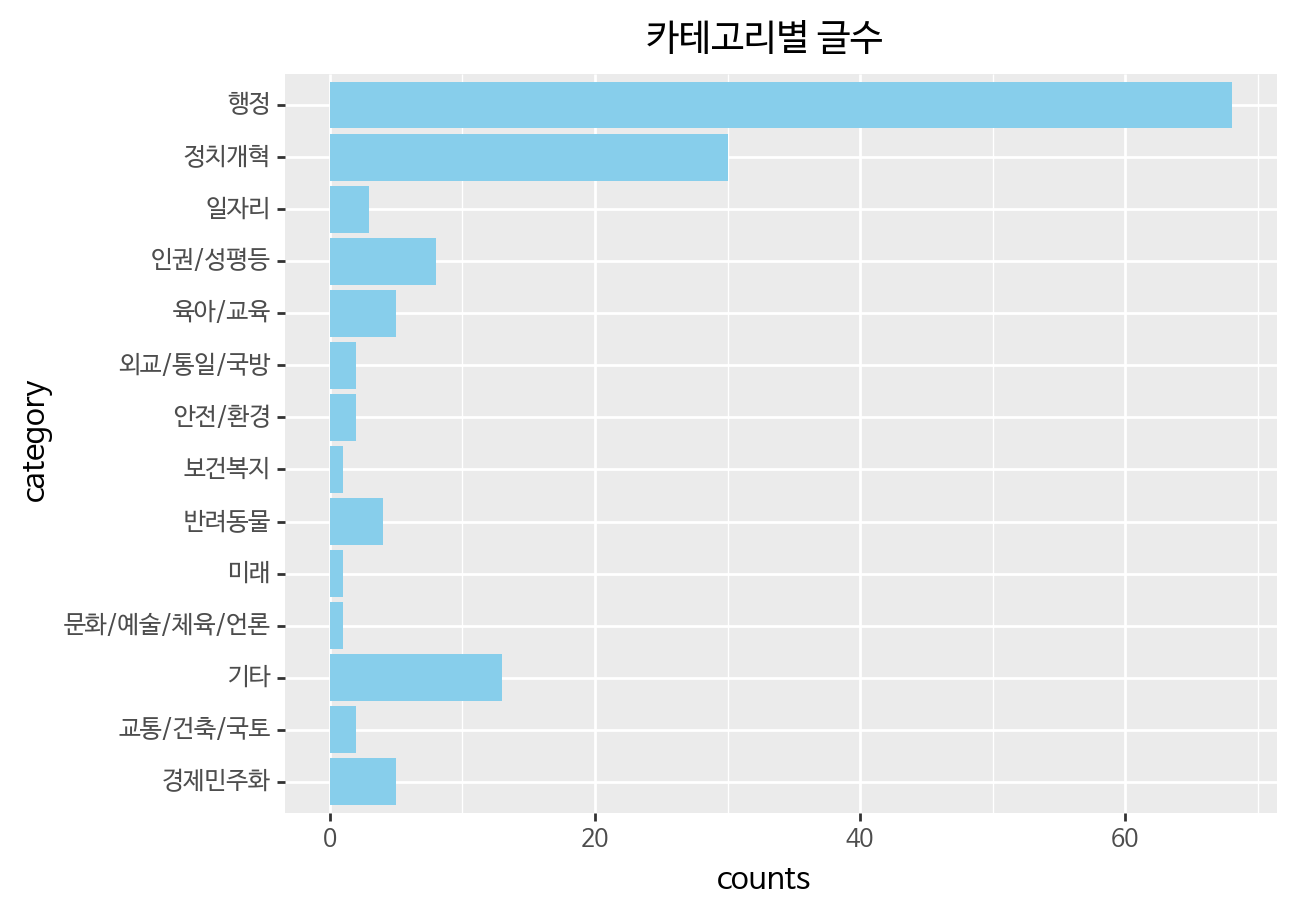

<ggplot: (-9223371910351139544)>

In [73]:
(ggplot(toy)
 + aes(x='category', y='counts')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 글수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)